### Context and Dataset

L'analyse des sentiments joue un rôle important dans le monde d'aujourd'hui, notamment pour les entreprises privées qui détiennent de nombreuses données. La quantité massive de données générées par Twitter présente une opportunité unique pour l'analyse des sentiments. Cependant, il est difficile de construire un modèle prédictif précis pour identifier les sentiments, qui peuvent manquer de contexte suffisant en raison de la limite de longueur. En outre, il peut être difficile de distinguer les sentiments des messages ordinaires en raison de l'ambiguïté des mots.

Il s'agit du jeu de données "sentiment140", qui contient 1 600 000 tweets extraits à l'aide du jeu de données twitter. Les tweets ont été annotés (0 = négatif, 4 = positif) et ils peuvent être utilisés pour détecter le sentiment . Il contient les 6 champs suivants :
- target: the polarity of the tweet (0 = negative, 4 = positive)

- userId: The id of the tweet ( 2087)

- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

- query: The query (lyx). If there is no query, then this value is NO_QUERY.

- username: the user that tweeted (robotickilldozr)

- tweet: the text of the tweet (Lyx is cool)

### Plan

1- Read Dataset

2- Exploratory Data Analysis

3- Preprocess the Dataset

4- Sentiment analysis

5- Vizualisation

6- Model selection

### Import Libraries

In [52]:
# 1.1 Data manipulation library
import pandas as pd 
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 1.2 OS related package

import os

# 1.3 Modeling librray
# 1.3.1 Scale data

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
# 1.4 Plotting library

import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
import gzip

### 1- Read Dataset

In [54]:
#Load the  data from the following website:
df0 = pd.read_csv('C:/Users/S/Downloads/data1.csv',encoding='ISO-8859–1', names=["target","userId","date","query","username","tweet"])
df0.head(10)

target      userId                          date     query  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
5       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
6       0  1467811592  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY   
7       0  1467811594  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY   
8       0  1467811795  Mon Apr 06 22:20:05 PDT 2009  NO_QUERY   
9       0  1467812025  Mon Apr 06 22:20:09 PDT 2009  NO_QUERY   

          username                                              tweet  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
5         joy_wolf                      @Kwesidei not the whole crew   
6          mybirch                                        Need a hug   
7             coZZ  @LOLTrish hey  long time no see! Yes.. Rains a...  
8  2Hood4Hollywood               @Tatiana_K nope they didn't have it   
9          mimismo                          @twittera que me muera ?

### 2- Exploratory Data Analysis

In [4]:
#Whats the size of your data
df0.shape

(1600000, 6)

In [5]:
# what is the size of your data?
len(df0)

1600000

In [12]:
temp = df0.groupby('target').count()['tweet'].reset_index().sort_values(by='tweet', ascending=False)  
temp

target   tweet
0       0  800000
1       4  800000

In [13]:
df0.tail()

target      userId                          date     query  \
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                username                                              tweet  
1599995  AmandaMarie1028  Just woke up. Having no school is the best fee...  
1599996      TheWDBoards  TheWDB.com - Very cool to hear old Walt interv...  
1599997           bpbabe  Are you ready for your MoJo Makeover? Ask me f...  
1599998     tinydiamondz  Happy 38th Birthday to my boo of alll time!!! ...  
1599999   RyanTrevMorris  happy #charitytuesday @theNSPCC @SparksCharity...

### 3- Preprocess the Dataset

In [15]:
#Describe your data
df0.describe()

target        userId
count  1.600000e+06  1.600000e+06
mean   2.000000e+00  1.998818e+09
std    2.000001e+00  1.935761e+08
min    0.000000e+00  1.467810e+09
25%    0.000000e+00  1.956916e+09
50%    2.000000e+00  2.002102e+09
75%    4.000000e+00  2.177059e+09
max    4.000000e+00  2.329206e+09

In [50]:
#Are there any missing values in the data?
df0.isnull().sum()

target      0
userId      0
date        0
query       0
username    0
tweet       0
dtype: int64

In [4]:
df0.columns = [i.lower() for i in df0.columns]
df0.columns

Index(['target', 'userid', 'date', 'query', 'username', 'tweet'], dtype='object')

In [5]:
# Exploring the Dataset
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   target    1600000 non-null  int64 
 1   userid    1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   query     1600000 non-null  object
 4   username  1600000 non-null  object
 5   tweet     1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


#### Bar Chart for Distribution of Data in accordance to Sentiment classes.

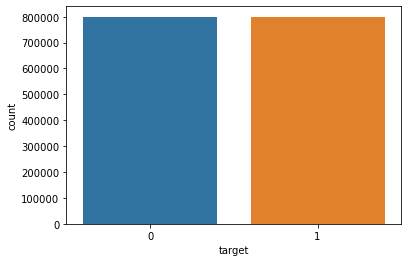

In [65]:
# countplot for the occurence of each target value
sns.countplot(x = 'target',data = df0)

There are 800,000 positive tweets and 800,000 negative tweets.

In [23]:
df0.head(20)

target      userid                                              tweet
0        0  1467810369  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1        0  1467810672  is upset that he can't update his Facebook by ...
2        0  1467810917  @Kenichan I dived many times for the ball. Man...
3        0  1467811184    my whole body feels itchy and like its on fire 
4        0  1467811193  @nationwideclass no, it's not behaving at all....
5        0  1467811372                      @Kwesidei not the whole crew 
6        0  1467811592                                        Need a hug 
7        0  1467811594  @LOLTrish hey  long time no see! Yes.. Rains a...
8        0  1467811795               @Tatiana_K nope they didn't have it 
9        0  1467812025                          @twittera que me muera ? 
10       0  1467812416        spring break in plain city... it's snowing 
11       0  1467812579                         I just re-pierced my ears 
12       0  1467812723  @caregiving I couldn't bear to watch it.  And ...
13       0  1467812771  @octolinz16 It it counts, idk why I did either...
14       0  1467812784  @smarrison i would've been the first, but i di...
15       0  1467812799  @iamjazzyfizzle I wish I got to watch it with ...
16       0  1467812964  Hollis' death scene will hurt me severely to w...
17       0  1467813137                               about to file taxes 
18       0  1467813579  @LettyA ahh ive always wanted to see rent  lov...
19       0  1467813782  @FakerPattyPattz Oh dear. Were you drinking ou...

In [24]:
#No neutral values
df0.target.unique()

array([0, 4], dtype=int64)

I will replace the '4' of 'positive' with '1' for clarity.

In [64]:
df0['target'] = df0['target'].replace(4,1)

In [42]:
df0.head(10)

target      userid                                              tweet
0       0  1467810369  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  1467810672  is upset that he can't update his Facebook by ...
2       0  1467810917  @Kenichan I dived many times for the ball. Man...
3       0  1467811184    my whole body feels itchy and like its on fire 
4       0  1467811193  @nationwideclass no, it's not behaving at all....
5       0  1467811372                      @Kwesidei not the whole crew 
6       0  1467811592                                        Need a hug 
7       0  1467811594  @LOLTrish hey  long time no see! Yes.. Rains a...
8       0  1467811795               @Tatiana_K nope they didn't have it 
9       0  1467812025                          @twittera que me muera ?

In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

Nous allons principalement supprimer les urls, les balises html et les ponctuations

In [56]:
import re, string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # miniscule
    text = text.lower()
    
    # removing usernames
    text = re.sub('@[^\s]+', '', text)

    # removing links
    text = re.sub('((https?://[^\s]+)|(www\.[^\s]+))','',text)
    
    # removing punctuation
    text = text.translate(str.maketrans('','',string.punctuation))
    
    # tokenization
    tokens = word_tokenize(text)
   
    # suppression of stop words and lemmatization
    wordLemm = WordNetLemmatizer()
    final_words = []
    for token in tokens:
      # suppression of stop words
      if token not in stop_words and len(token) > 1:
        lemm = wordLemm.lemmatize(token)
        final_words.append(lemm)
    return ' '.join(final_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Comme la base de données est importante, nous allons diviser la taille de chaque catégorie de tweets par 50.

In [80]:
# splitting categories
df_positive = df0[df0['target'] == 1]
df_negative = df0[df0['target'] == 0]
# sampling
df_positive = df_positive.iloc[:16000]
df_negative = df_negative.iloc[:16000]
# concatenation
df = pd.concat([df_positive, df_negative])
len(df)

32000

In [81]:
df_positive.head()

target      userId                          date     query  \
800000       1  1467822272  Mon Apr 06 22:22:45 PDT 2009  NO_QUERY   
800001       1  1467822273  Mon Apr 06 22:22:45 PDT 2009  NO_QUERY   
800002       1  1467822283  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800003       1  1467822287  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800004       1  1467822293  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   

           username                                              tweet  
800000        ersle       I LOVE @Health4UandPets u guys r the best!!   
800001     becca210  im meeting up with one of my besties tonight! ...  
800002    Wingman29  @DaRealSunisaKim Thanks for the Twitter add, S...  
800003    katarinka  Being sick can be really cheap when it hurts t...  
800004  _EmilyYoung    @LovesBrooklyn2 he has that effect on everyone

In [66]:
df0[df0['target'] == 1].head()

target      userId                          date     query  \
800000       1  1467822272  Mon Apr 06 22:22:45 PDT 2009  NO_QUERY   
800001       1  1467822273  Mon Apr 06 22:22:45 PDT 2009  NO_QUERY   
800002       1  1467822283  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800003       1  1467822287  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800004       1  1467822293  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   

           username                                              tweet  
800000        ersle       I LOVE @Health4UandPets u guys r the best!!   
800001     becca210  im meeting up with one of my besties tonight! ...  
800002    Wingman29  @DaRealSunisaKim Thanks for the Twitter add, S...  
800003    katarinka  Being sick can be really cheap when it hurts t...  
800004  _EmilyYoung    @LovesBrooklyn2 he has that effect on everyone

In [10]:
df0.drop_duplicates(inplace = True)

So I went from 1.6 million tweets to 32,000 tweets.

In [92]:
df['cleaned_text'] = df['tweet'].apply(lambda x: clean_text(x))
df.head()

target      userId                          date     query  \
800000       1  1467822272  Mon Apr 06 22:22:45 PDT 2009  NO_QUERY   
800001       1  1467822273  Mon Apr 06 22:22:45 PDT 2009  NO_QUERY   
800002       1  1467822283  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800003       1  1467822287  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800004       1  1467822293  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   

           username                                              tweet  \
800000        ersle       I LOVE @Health4UandPets u guys r the best!!    
800001     becca210  im meeting up with one of my besties tonight! ...   
800002    Wingman29  @DaRealSunisaKim Thanks for the Twitter add, S...   
800003    katarinka  Being sick can be really cheap when it hurts t...   
800004  _EmilyYoung    @LovesBrooklyn2 he has that effect on everyone    

        Subjectivity  Polarity  \
800000      0.450000  0.750000   
800001      0.000000  0.000000   
800002      0.200000  0.250000   
800003      0.514286  0.021429   
800004      0.000000  0.000000   

                                             cleaned_text  
800000                                      love guy best  
800001  im meeting one besties tonight cant wait girl ...  
800002  thanks twitter add sunisa got meet hin show dc...  
800003  sick really cheap hurt much eat real food plus...  
800004                                    effect everyone

### 4- Sentiment Analysis
Maintenant, on peut utiliser le texte nettoyé pour calculer à nouveau les paramètres de polarité, de subjectivité, de sentiments négatis et positifs.

#### Subjectivity 

Dans l'analyse des sentiments, la subjectivité est également un nombre flottant qui se situe dans l'intervalle [0,1]. Lorsqu'elle est proche de 0, il s'agit plutôt de faits. Lorsque la subjectivité augmente, il s'agit presque d'une opinion.

#### Polarity

La polarité est une valeur flottante qui se situe dans l'intervalle [-1,1] où 1 signifie une déclaration positive et -1 une déclaration négative. 

In [84]:
from textblob import TextBlob

#Calculating Negative, Positive values

def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [87]:
df['Subjectivity']=df['tweet'].apply(getSubjectivity)
df['Polarity']=df['tweet'].apply(getPolarity)

In [88]:
df.head(10)

target      userId                          date     query  \
800000       1  1467822272  Mon Apr 06 22:22:45 PDT 2009  NO_QUERY   
800001       1  1467822273  Mon Apr 06 22:22:45 PDT 2009  NO_QUERY   
800002       1  1467822283  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800003       1  1467822287  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800004       1  1467822293  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800005       1  1467822391  Mon Apr 06 22:22:47 PDT 2009  NO_QUERY   
800006       1  1467822447  Mon Apr 06 22:22:51 PDT 2009  NO_QUERY   
800007       1  1467822465  Mon Apr 06 22:22:48 PDT 2009  NO_QUERY   
800008       1  1467822489  Mon Apr 06 22:22:49 PDT 2009  NO_QUERY   
800009       1  1467822496  Mon Apr 06 22:22:49 PDT 2009  NO_QUERY   

             username                                              tweet  \
800000          ersle       I LOVE @Health4UandPets u guys r the best!!    
800001       becca210  im meeting up with one of my besties tonight! ...   
800002      Wingman29  @DaRealSunisaKim Thanks for the Twitter add, S...   
800003      katarinka  Being sick can be really cheap when it hurts t...   
800004    _EmilyYoung    @LovesBrooklyn2 he has that effect on everyone    
800005  ajarofalmonds  @ProductOfFear You can tell him that I just bu...   
800006      vmdavinci  @r_keith_hill Thans for your response. Ihad al...   
800007  jessicavaliyi  @KeepinUpWKris I am so jealous, hope you had a...   
800008     emmasaur28  @tommcfly ah, congrats mr fletcher for finally...   
800009  SherylBreuker  @e4VoIP I RESPONDED  Stupid cat is helping me ...   

        Subjectivity  Polarity  
800000      0.450000  0.750000  
800001      0.000000  0.000000  
800002      0.200000  0.250000  
800003      0.514286  0.021429  
800004      0.000000  0.000000  
800005      0.500000  0.175000  
800006      0.000000  0.000000  
800007      0.675000  0.890625  
800008      1.000000  0.000000  
800009      1.000000 -0.800000

#### The distribution of the subjectivity score

Text(0.5, 1.0, 'Distribution of Subjectivity Score')

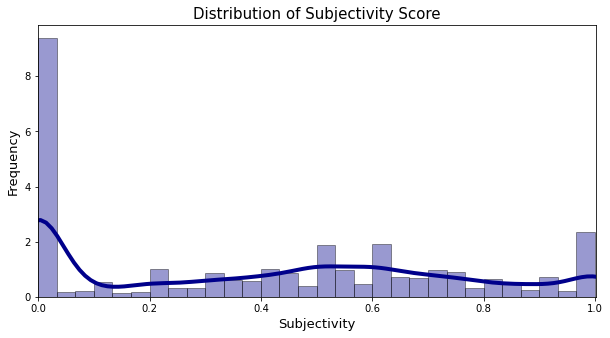

In [90]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['Subjectivity'], hist=True, kde=True,
bins=int(30), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)

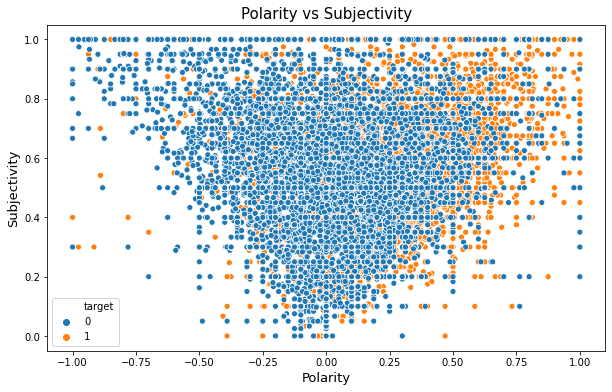

In [89]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Polarity', y='Subjectivity', hue="target", data=df)
plt.xlabel('Polarity', fontsize=13)
plt.ylabel('Subjectivity', fontsize=13)
plt.title('Polarity vs Subjectivity', fontsize=15)
plt.show();

### 5- Vizualisation

Wordcloud by class (positive / negative)

Text(0.5, 1.0, 'Tweets positifs')

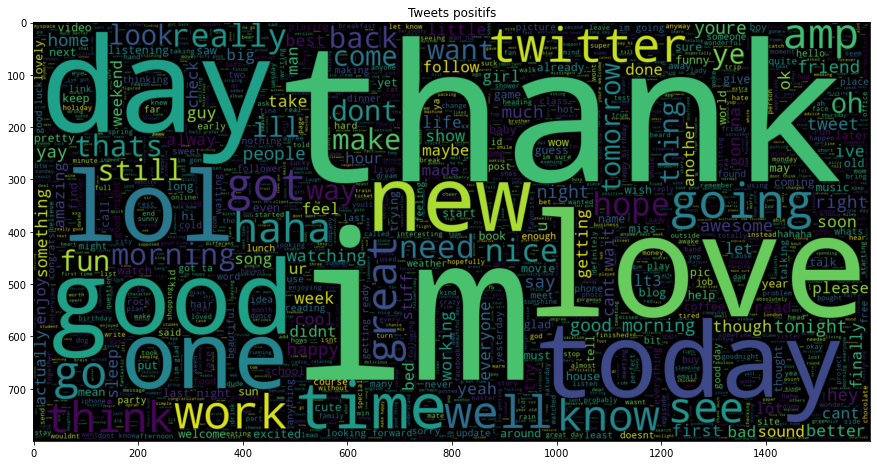

In [36]:
from wordcloud import WordCloud
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == 1].cleaned_text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Tweets positifs')

Text(0.5, 1.0, 'Tweets négatifs')

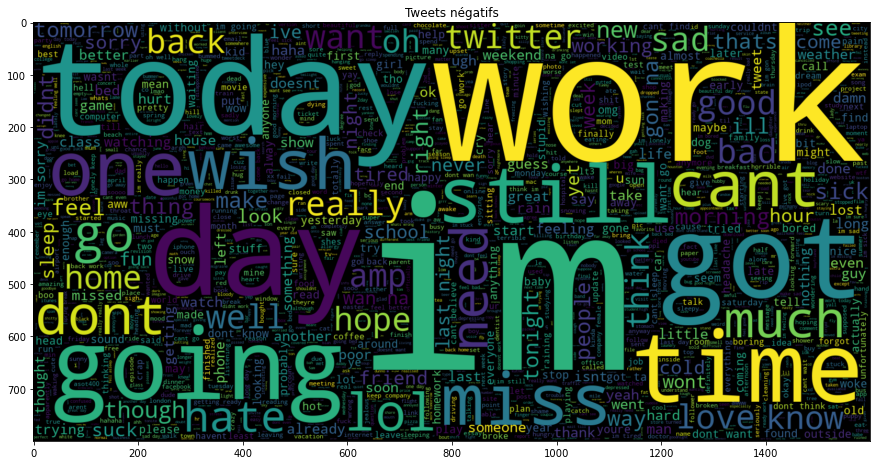

In [37]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == 0].cleaned_text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Tweets négatifs')

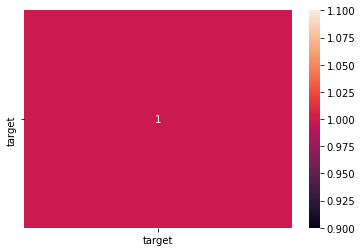

In [94]:
df[["target","cleaned_text"]].corr()
sns.heatmap(df[["target","cleaned_text"]].corr(), annot= True)

In [96]:
# Most Common Word
from collections import Counter
df['tweet'] = df['tweet'].apply(lambda x : str(x).split())
temp = Counter(item for sublist in df['tweet'] for item in sublist)
top = pd.DataFrame(temp.most_common(20))
top.columns = ['Common_words', 'count']
top

Common_words  count
0            to  11558
1           the   9980
2             I   9893
3             a   7608
4           and   5491
5            my   5383
6            is   4835
7           for   4420
8             i   4349
9            in   4274
10          you   4138
11           of   3843
12           it   3507
13           on   3124
14         have   2705
15         that   2368
16           me   2329
17           so   2304
18           be   2220
19         with   2219

In [97]:
import plotly.express as px
fig = px.bar(top, x='count', y='Common_words', title='Common words in Selected Text', orientation='h', width=700, height=700, color='Common_words')
fig.show()

In [52]:
decode_map = {0: "NEGATIVE", 1: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [55]:
%%time
df.target = df.target.apply(lambda x: decode_sentiment(x))

Wall time: 20.7 ms


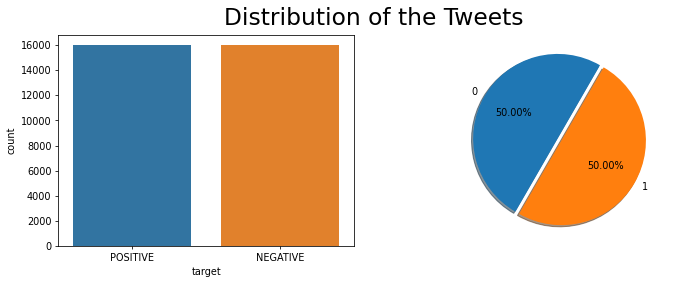

In [57]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4), dpi=70)
sns.countplot(df['target'], ax=axes[0])
axes[1].pie(df['target'].value_counts(),
            labels=["0", "1"],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Distribution of the Tweets', fontsize=24)
plt.show()

On observe que le jeu de données n'a pas de problème d'étiquette déséquilibrée. Les étiquettes négatives et positives sont égales. La situation d'équilibre permettra au modèle d'apprendre plus précisément.

In [59]:
# Creating a new feature for the visualization.

df['Character Count'] = df['cleaned_text'].apply(lambda x: len(str(x)))


def plot_dist3(df_x, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df_x.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(x=feature, data=df, orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=25))

    plt.suptitle(f'{title}', fontsize=24)

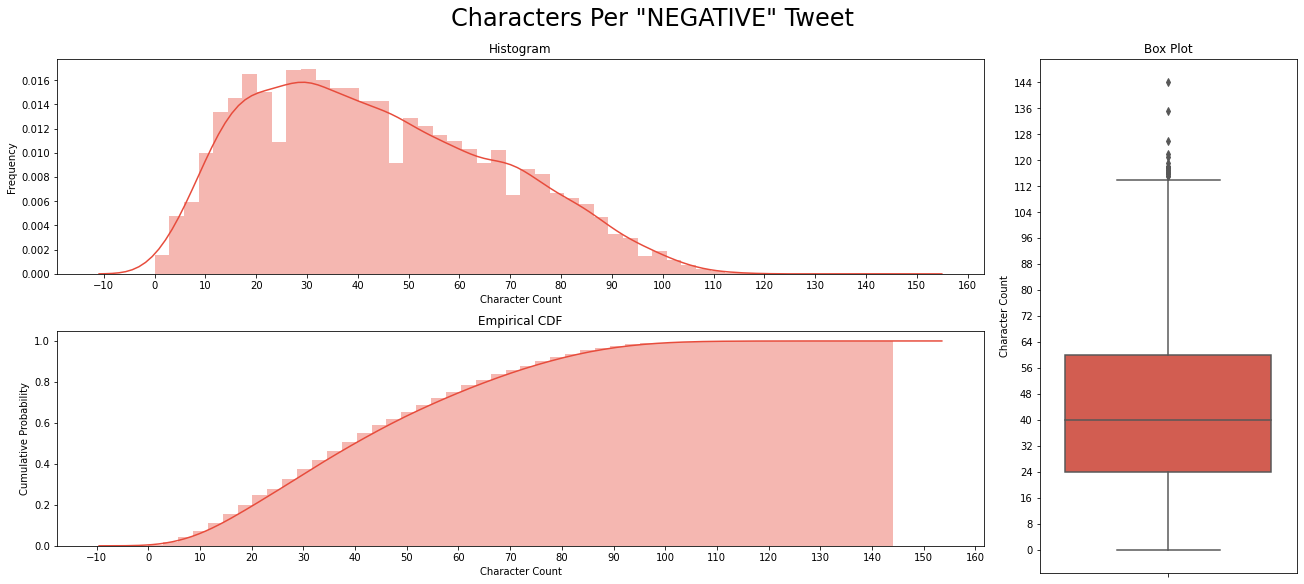

In [61]:
# For customizing our plots.
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

plot_dist3(df[df['target'] == 'NEGATIVE'], 'Character Count',
           'Characters Per "NEGATIVE" Tweet')

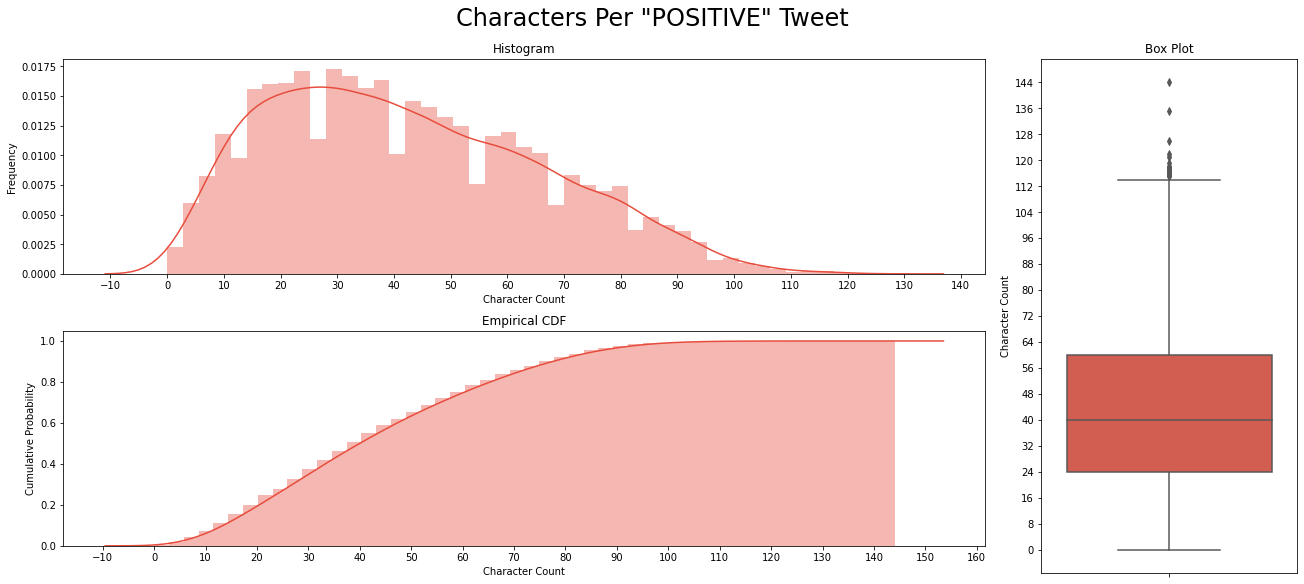

In [62]:
plot_dist3(df[df['target'] == "POSITIVE"], 'Character Count',
           'Characters Per "POSITIVE" Tweet')

As a quick and easy observation, we can say that dataset has no imbalanced label problem. Negative and Positive labels are equal. The situation of equilibrium will let model to learn more accurate. However, should not be forgotten, dataset might has lots of mislabelled text due to way of collection which has only parameter as ":)" : positive or ":(" : negative. The problem is that lots of user may send ":)" or ":(" ironically.

An example: "u look like a sh*t today :)"

This problem may decrease the accuracy, however, end of the day we're creating a sentiment-aware model depending on the words.

In [63]:
#### for visualizations ####
# plotly
from plotly.offline import iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots


In [65]:
class_group_counts = df.groupby('target').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
class_group_counts.style.background_gradient(cmap='Blues')

In [67]:
# create the trace
trace = go.Pie(
    labels = class_group_counts.target,
    values = class_group_counts.tweet
)

data = [trace]
layout = go.Layout(title="Pie plot of the distribution of the categorical classes")

fig = go.Figure(data = data,layout=layout)
fig.show()

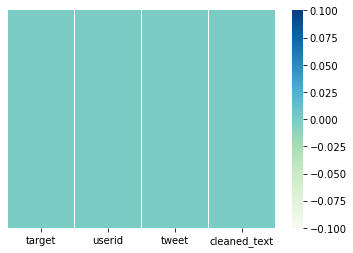

In [73]:
# Plot for missing values across different columns
missing_graph = sns.heatmap(df0.isnull(), cbar=True, yticklabels=False, cmap="GnBu")
plt.show()

### 6- Model selection

Splitting dataset in train and test

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['cleaned_text'].values, df['target'].values, test_size=0.2, random_state=1)
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

x_train :  (25600,)
y_train :  (25600,)
x_test :  (6400,)
y_test :  (6400,)


#### Vectorization with CountVectorizer and classification

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer=CountVectorizer()

countVec_train=count_vectorizer.fit_transform(x_train) 
countVec_test=count_vectorizer.transform(x_test)
print("count_train : ", countVec_train.shape)
print("count_test : ", countVec_test.shape)

count_train :  (25600, 25161)
count_test :  (6400, 25161)


#### Classification using Logistic Regression

In [118]:
import gensim
print(gensim.__version__)

4.1.2


There are models already trained on tweets which are available through this link https://nlp.stanford.edu/data/glove.twitter.27B.zip. These models have been trained on a vocabulary of 1.2 million tokens.
I load the model with Gensim's load_word2vec_format function.

In [121]:
pretrained_glove_w2v = gensim.models.KeyedVectors.load_word2vec_format('C:/Users/S/Downloads/twitter/glove.twitter.27B.50d.txt', binary=False, no_header=True)

In [122]:
# vectorization of tweets
pretrained_glove_w2v_train=w2v_of_sentences(x_train, pretrained_glove_w2v)
pretrained_glove_w2v_test=w2v_of_sentences(x_test, pretrained_glove_w2v)
print("w2v_train : ", pretrained_glove_w2v_train.shape)
print("w2v_test : ", pretrained_glove_w2v_test.shape)

w2v_train :  (25600, 50)
w2v_test :  (6400, 50)


In [123]:
from sklearn.linear_model import LogisticRegression
np.random.seed(0)
lr_clf_pretrained_glove_w2v = LogisticRegression(max_iter=100, solver='liblinear')
lr_clf_pretrained_glove_w2v = lr_clf_pretrained_glove_w2v.fit(pretrained_glove_w2v_train, y_train)

In [124]:
from sklearn.metrics import accuracy_score
y_pred = lr_clf_pretrained_glove_w2v.predict(pretrained_glove_w2v_test)

score = accuracy_score(y_test,y_pred)

print(f'Accuracy: {round(score*100,2)}%')
# Confusion matrix
pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'])

Accuracy: 69.42%


Predicted     0     1
True                 
0          2226   943
1          1014  2217

#### Classification using Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)
rf_clf_pretrained_glove_w2v = RandomForestClassifier()
rf_clf_pretrained_glove_w2v = rf_clf_pretrained_glove_w2v.fit(pretrained_glove_w2v_train, y_train)

In [126]:
from sklearn.metrics import accuracy_score
y_pred = rf_clf_pretrained_glove_w2v.predict(pretrained_glove_w2v_test)

score = accuracy_score(y_test,y_pred)

print(f'Accuracy: {round(score*100,2)}%')
# Confusion matrix
pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'])

Accuracy: 69.11%


Predicted     0     1
True                 
0          2259   910
1          1067  2164